In [140]:
from openpyxl import *
import sys
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os.path
from datetime import datetime
import pandas as pd
import seaborn as sns


# Some helpful functions that calculate the
# the number of years between two dates.
def yearsago(years, from_date=None):
    if from_date is None:
        from_date = datetime.now()
    try:
        return from_date.replace(year=from_date.year - years)
    except ValueError:
        # Must be 2/29!
        assert from_date.month == 2 and from_date.day == 29 # can be removed
        return from_date.replace(month=2, day=28,
                                 year=from_date.year-years)
    
def num_years(begin, end=None):
    if end is None:
        end = datetime.now()
    num_years = int((end - begin).days / 365.25)
    if begin > yearsago(num_years, end):
        return num_years - 1
    else:
        return num_years
    
def diff_month(begin, end):
    return (end.year - begin.year) * 12 + end.month - begin.month

In [141]:

if sys.platform == "darwin" or sys.platform == "linux" or sys.platform == "linux2":
        project_root = os.path.expanduser("~") + "/Dropbox/water_scarcity/"
elif sys.platform == "win32":
        project_root = os.path.expanduser("~") + "\\Dropbox\\water_scarcity\\"
else:
    print("OS %s not supported" % sys.platform)
    exit(-1)


# Generate data path
consumer_data_path = project_root + os.path.join("analysis", "data", "pending_consumers", "raw")

# Output path
output_path = project_root + os.path.join("analysis", "output", "figures")

# Output data path
output_data_path = project_root + os.path.join("analysis", "data", "pending_consumers", "clean")

# Set up file paths
paths = [consumer_data_path + "/bansur.xlsx",
             consumer_data_path + "/mundawar.xlsx",
             consumer_data_path + "/nainwa.xls",
             consumer_data_path + "/hindoli.xlsx"]

# worksheets
mundawar_worksheet = load_workbook(paths[1])["Sheet1"]
hindoli_worksheet = load_workbook(paths[3])["Sheet1"]

In [142]:
date_applied_mundawar = mundawar_worksheet["J"] 
date_applied_mundawar = [date.value for date in date_applied_mundawar][3:-1]

date_received_mundawar = mundawar_worksheet["K"]
date_received_mundawar = [date.value for date in date_received_mundawar][3:-1]

date_applied_hindoli = hindoli_worksheet["C"]
date_applied_hindoli = [date.value for date in date_applied_hindoli if date.value is not None][2:-1]
date_applied_hindoli = [datetime.strptime(date,'%d.%m.%y') for date in date_applied_hindoli]

date_received_hindoli = hindoli_worksheet["J"]
date_received_hindoli = [date.value for date in date_received_hindoli if date.value is not None][2:-1]
date_received_hindoli = [datetime.strptime(date,'%d.%m.%y') for date in date_received_hindoli]

date_applied = date_applied_mundawar + date_applied_hindoli
date_received = date_received_mundawar + date_received_hindoli

time_in_years = [num_years(begin,end) for begin, end in zip(date_applied, date_received)]
time_in_months = [diff_month(begin,end) for begin, end in zip(date_applied, date_received)]

pd.DataFrame.from_dict({'months':time_in_months,'years':time_in_years}).to_stata(output_data_path + '/waiting_times_all.dta',write_index=False)

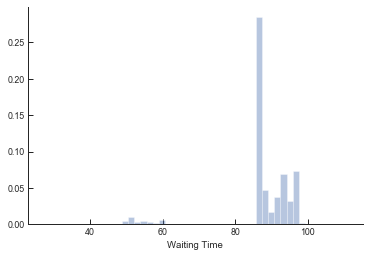